# Grayscale and color image

In [73]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

RGB = ['red', 'green', 'blue']
NUM_CHANNELS = 3
IDX_CHANNELS = {'red': 0, 'green': 1, 'blue': 2}
image = cv2.imread("test.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(333, 500, 3)

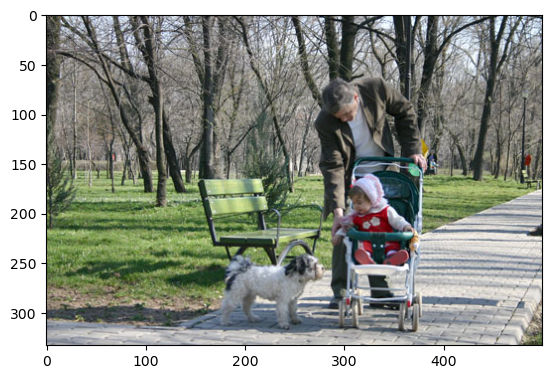

In [3]:
plt.imshow(image)

## Channels splitting from color image

In [69]:
def split(image):
    channels = []
    for i in range(NUM_CHANNELS):
        channel = np.zeros(image.shape[0:-1], dtype=int)
        channel = image[:,:,i]
        channels.append(channel)
    return channels

def format_channel(channel, color):
    '''Helper function to change one-channel format to three-channel format.'''
    zero_channel = np.zeros(a.shape, dtype=int)
    if color == 'gray':
        format_image = np.stack([channel, channel, channel], axis=2)
    else:
        i = IDX_CHANNELS[color]
        channels = [zero_channel, zero_channel]
        channels.insert(i, channel)
        format_image = np.stack(channels, axis=2)
    return format_image

In [70]:
channels = split(image)
channels[0].shape

(333, 500)

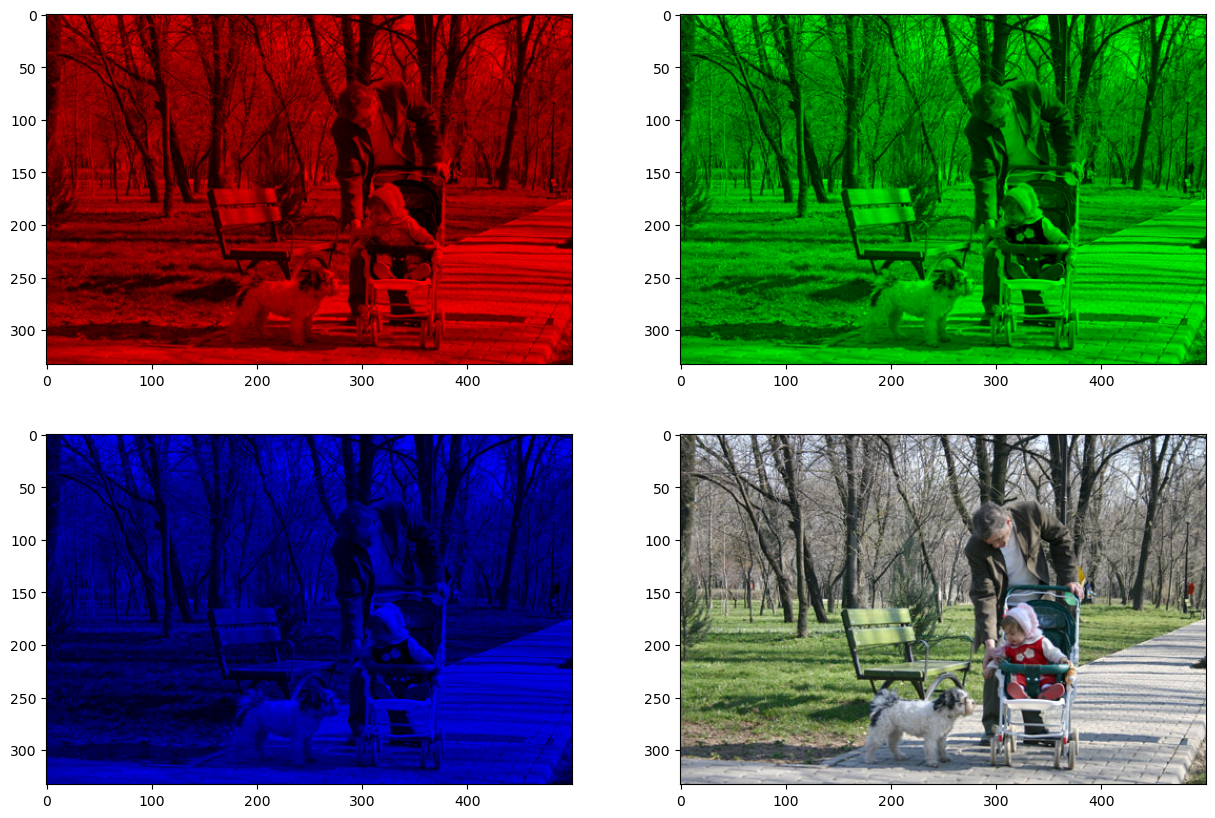

In [71]:
fig = plt.figure(figsize=(15, 10))
columns = 2
rows = 2
channels = split(image)
for i, color in zip(range(NUM_CHANNELS), RGB):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(format_channel(channels[i], color))
    
merged_image = np.sum(list(map(format_channel, channels, RGB)), axis=0)
fig.add_subplot(rows, columns, NUM_CHANNELS + 1)
plt.imshow(merged_image)
plt.show()

The first three images are single channels displayed as RGB image format, which are split from the color image. When we merge them again, we get back the original image.

## Color image to grayscale

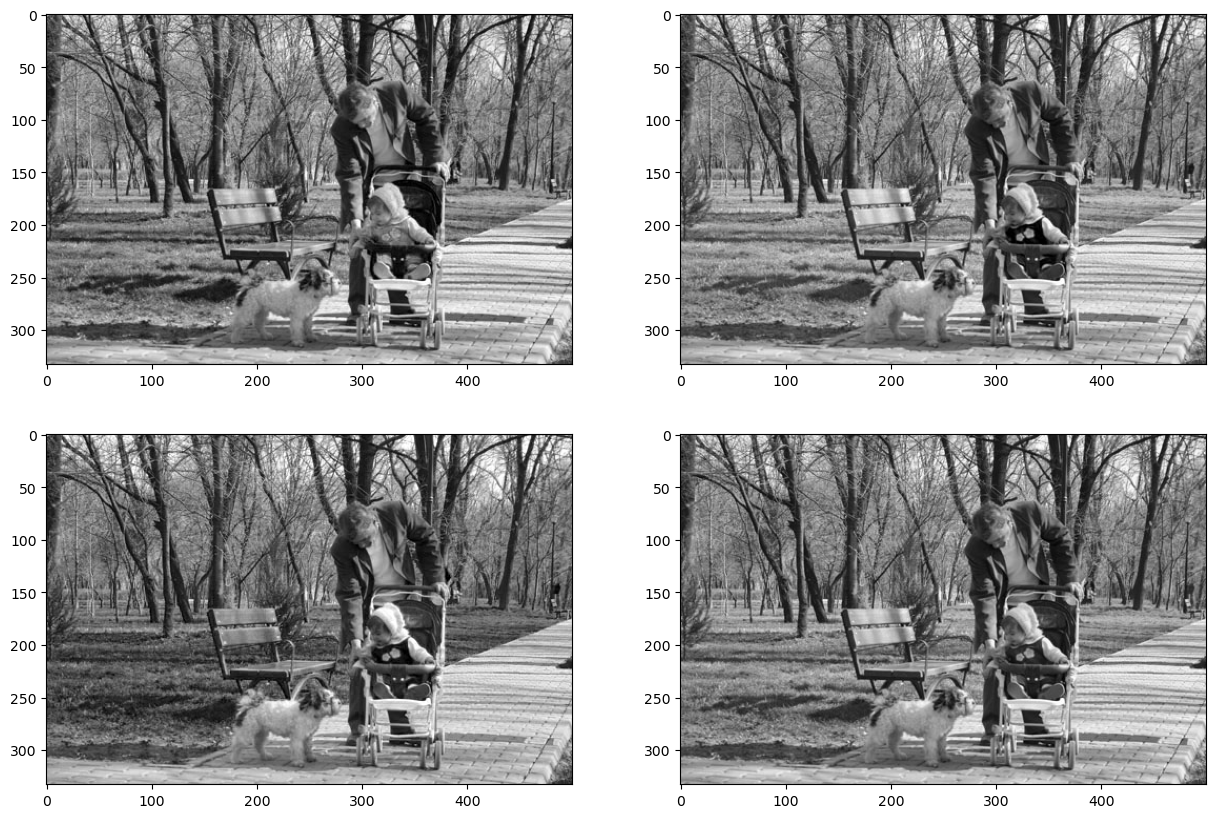

In [68]:
def get_grayscale_image(image, weights):
    return np.dot(image, weights).astype(int)

fig = plt.figure(figsize=(15, 10))
columns = 2
rows = 2
test_weights = [[1,0,0], [0,1,0], [0,0,1], [0.299, 0.587, 0.114]]

for i, weights in zip(range(NUM_CHANNELS + 1), test_weights):
    fig.add_subplot(rows, columns, i + 1)
    gray_image = get_grayscale_image(image, weights)
    plt.imshow(format_channel(gray_image, 'gray'))
    
plt.show()

The first three grayscale images are the grayscale equivalences of three single channels. The fourth grayscale image (bottom-right) is converted using the formula: `gray = red * 0.299 + green * 0.587 + blue * 0.114`.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Beyoglu_4671_tricolor.png/600px-Beyoglu_4671_tricolor.png" 
     align="center" 
     width="500" />

## Grayscale to color image

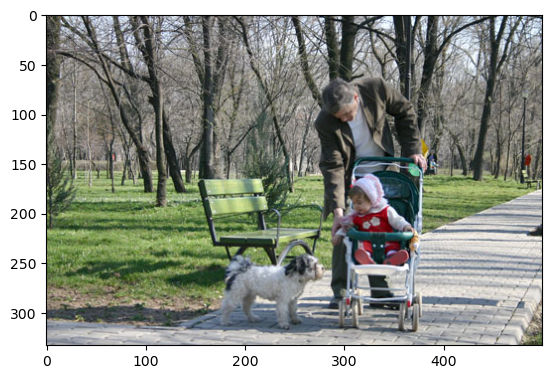

In [72]:
# Get the three color channels which are displayed as grayscale
grayscale_red = get_grayscale_image(image, [1,0,0])
grayscale_green = get_grayscale_image(image, [0,1,0])
grayscale_blue = get_grayscale_image(image, [0,0,1])

# Merge (stack) them to recreate the original color image
color_image = np.zeros(image.shape, dtype=int)
color_image[:,:,0] = grayscale_red
color_image[:,:,1] = grayscale_green
color_image[:,:,2] = grayscale_blue

plt.imshow(color_image)